In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
test = pd.read_csv("test_table.csv")

In [3]:
test.isna().any()

user_id             False
date                False
source              False
device              False
browser_language    False
ads_channel          True
browser             False
conversion          False
test                False
dtype: bool

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  int64 
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       181877 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [7]:
test[:3]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0


###  Confirm that the test is actually negative. 

In [9]:
test_g = test[test['test'] == 1]
ctrl_g = test[test['test'] == 0]
test_g.shape
ctrl_g.shape

(215983, 9)

(237338, 9)

In [10]:
test_g.shape[0]/ctrl_g.shape[0]

0.9100228366296168

In [13]:
from scipy import stats

stats.ttest_ind(test_g['conversion'], ctrl_g['conversion'], equal_var=False, alternative = 'less')

Ttest_indResult(statistic=-18.312271285740266, pvalue=3.5153883721563386e-75)

H0: test is greater or equal to control in conversion  
H1: test is less than control in conversion  
The p-value < 0.001, so the test is negative.

### Investigate reasons

In [17]:
user = pd.read_csv("user_table.csv")
user.isna().any()

user_id    False
sex        False
age        False
country    False
dtype: bool

In [18]:
df = test.merge(user, on = 'user_id')
df[:3]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain


In [21]:
test_g = df[df['test'] == 1]
ctrl_g = df[df['test'] == 0]

In [22]:
df['date'].value_counts()

2015-12-04    141024
2015-12-03     99399
2015-11-30     70948
2015-12-01     70915
2015-12-02     70581
Name: date, dtype: int64

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Source for control and test group')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Device for control and test group')

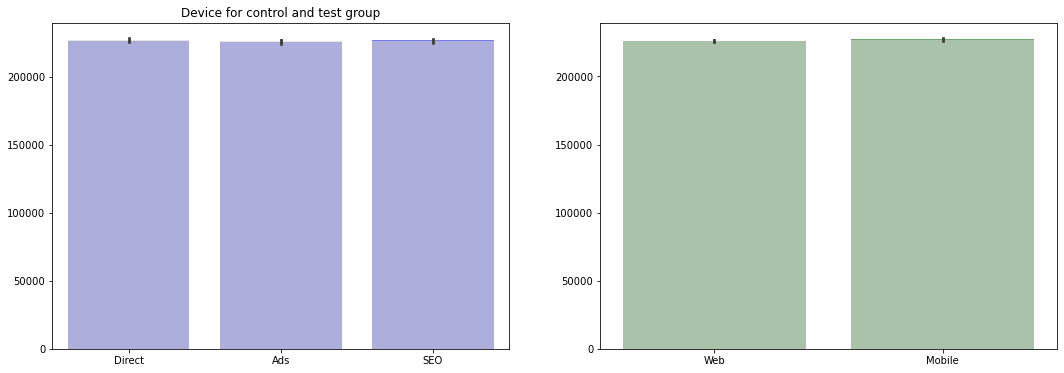

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(y = test_g['source'].index, x = test_g['source'].values, label = 'test', color = 'blue', alpha = 0.6, ax = ax[0])
sns.barplot(y = ctrl_g['source'].index, x = ctrl_g['source'].values, label = 'control',color = 'lightgrey', alpha = 0.6, ax = ax[0])
ax[0].set_title('Source for control and test group')

sns.barplot(y = test_g['device'].index, x = test_g['device'].values, label = 'test', color = 'green', alpha = 0.6, ax = ax[1])
sns.barplot(y = ctrl_g['device'].index, x = ctrl_g['device'].values, label = 'control',color = 'lightgrey', alpha = 0.6, ax = ax[1])
ax[0].set_title('Device for control and test group')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Browser Language for control and test group')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Ads Channel for control and test group')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Browser for control and test group')

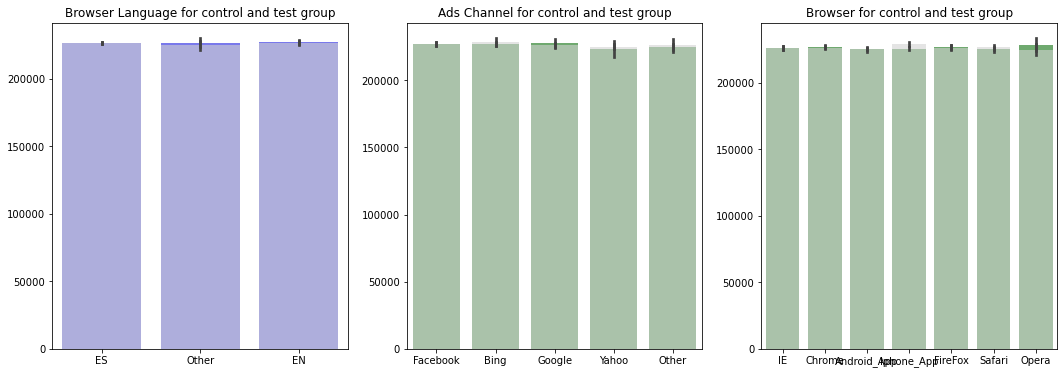

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.barplot(y = test_g['browser_language'].index, x = test_g['browser_language'].values, label = 'test', color = 'blue', alpha = 0.6, ax = ax[0])
sns.barplot(y = ctrl_g['browser_language'].index, x = ctrl_g['browser_language'].values, label = 'control',color = 'lightgrey', alpha = 0.6, ax = ax[0])
ax[0].set_title('Browser Language for control and test group')

sns.barplot(y = test_g['ads_channel'].index, x = test_g['ads_channel'].values, label = 'test', color = 'green', alpha = 0.6, ax = ax[1])
sns.barplot(y = ctrl_g['ads_channel'].index, x = ctrl_g['ads_channel'].values, label = 'control',color = 'lightgrey', alpha = 0.6, ax = ax[1])
ax[1].set_title('Ads Channel for control and test group')

sns.barplot(y = test_g['browser'].index, x = test_g['browser'].values, label = 'test', color = 'green', alpha = 0.6, ax = ax[2])
sns.barplot(y = ctrl_g['browser'].index, x = ctrl_g['browser'].values, label = 'control',color = 'lightgrey', alpha = 0.6, ax = ax[2])
ax[2].set_title('Browser for control and test group')


<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Sex for control and test group')

<AxesSubplot:>

Text(0.5, 1.0, 'Country for control and test group')

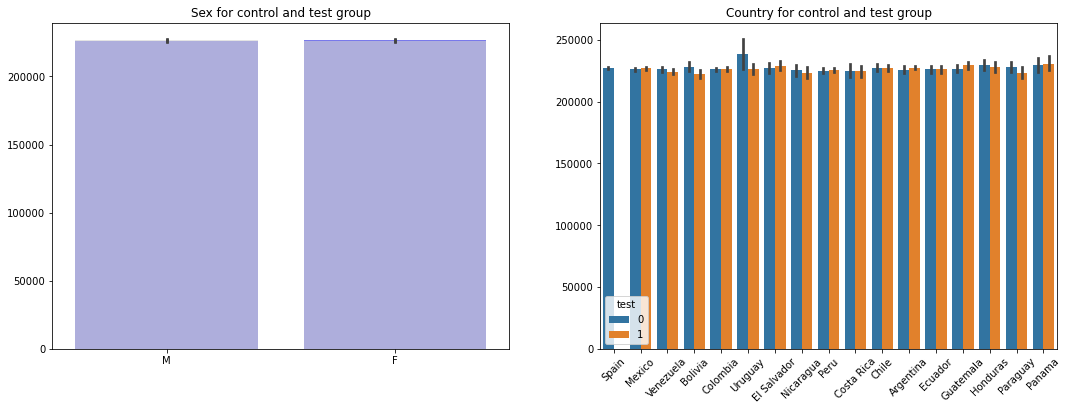

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(y = test_g['sex'].index, x = test_g['sex'].values, label = 'test', color = 'blue', alpha = 0.6, ax = ax[0])
sns.barplot(y = ctrl_g['sex'].index, x = ctrl_g['sex'].values, label = 'control',color = 'lightgrey', alpha = 0.6, ax = ax[0])
ax[0].set_title('Sex for control and test group')

#sns.barplot(y = test_g['country'].index, x = test_g['country'].values, label = 'test', color = 'green', alpha = 0.6, ax = ax[1])
#sns.barplot(y = ctrl_g['country'].index, x = ctrl_g['country'].values, label = 'control',color = 'grey', alpha = 0.6, ax = ax[1])
sns.barplot(y = df['country'].index, x = df['country'].values, hue = df['test'], ax = ax[1])
ax[1].set_title('Country for control and test group')
ax[1].tick_params(axis='x', rotation=45)

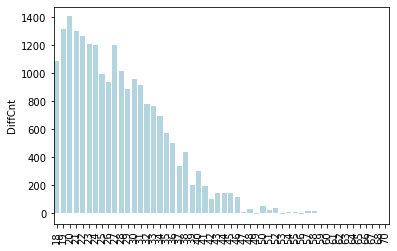

In [71]:
test_age = test_g['age'].value_counts()
ctrl_age = ctrl_g['age'].value_counts()
age_df = pd.DataFrame({'TestAge':test_age, 'ControlAge':ctrl_age})
age_df.fillna(0, inplace = True)
age_df['DiffCnt'] = age_df['ControlAge'] - age_df['TestAge']

plt = sns.barplot(x = age_df.index, y = age_df['DiffCnt'], color = 'lightblue')
plt.tick_params(axis='x', rotation=90)

So the reasons might be:
- test group does not contain country 'Spain'
- control group has more people in younger ages compared to test group.

In [95]:
new_test_g = test_g[test_g['country'] != 'Spain']
new_ctrl_g = ctrl_g[ctrl_g['country'] != 'Spain']
print('Test mean conversion rate without Spain: ', new_test_g['conversion'].mean())
print('Control mean conversion rate without Spain: ', new_ctrl_g['conversion'].mean())
stats.ttest_ind(new_test_g['conversion'], new_ctrl_g['conversion'], equal_var=False, alternative = 'less')

Test mean conversion rate without Uruguay:  0.043411161678422794
Control mean conversion rate without Uruguay:  0.04829179055749524


Ttest_indResult(statistic=-7.353895203080277, pvalue=9.644589288899516e-14)

However, testing result suggests excluding Spain does not solve the problem. Another guess is Simpson's Paradox, where for each country, the conversion may vary, and merely aggregating the results by ignoring country is incorrect.

In [96]:
#pd.pivot_table(df, values = 'conversion', index = 'country', columns = 'test', aggfunc = np.mean)
# break down dataframe by country
for country, df_country in df.groupby('country'):
    print(country)
    test_conversion = df_country[df_country['test'] == 1]['conversion'].mean()
    control_conversion = df_country[df_country['test'] == 0]['conversion'].mean()
    if test_conversion >= control_conversion:
        print('Test converted more')
    else:
        print('Control converted more')
    test = df_country[df_country['test'] == 1]
    control = df_country[df_country['test'] == 0]
    stats.ttest_ind(test['conversion'], control['conversion'], equal_var=False, alternative = 'less')

Argentina
Control converted more


Ttest_indResult(statistic=-0.9638326839451179, pvalue=0.1675732734373433)

Bolivia
Control converted more


Ttest_indResult(statistic=-0.3599581772440242, pvalue=0.35944262342255373)

Chile
Test converted more


Ttest_indResult(statistic=1.030372864438366, pvalue=0.8485761784577766)

Colombia
Control converted more


Ttest_indResult(statistic=-0.7999917822370824, pvalue=0.2118595370657057)

Costa Rica
Test converted more


Ttest_indResult(statistic=0.40176067651471453, pvalue=0.6560618231463007)

Ecuador
Control converted more


Ttest_indResult(statistic=-0.04825742619891805, pvalue=0.4807558453003311)

El Salvador
Control converted more


Ttest_indResult(statistic=-1.1549940887832975, pvalue=0.1240633371633339)

Guatemala
Control converted more


Ttest_indResult(statistic=-0.564963151462051, pvalue=0.28605360409560343)

Honduras
Control converted more


Ttest_indResult(statistic=-0.7201328432821794, pvalue=0.2357314282628793)

Mexico
Test converted more


Ttest_indResult(statistic=1.3866735952325449, pvalue=0.9172281389448017)

Nicaragua
Test converted more


Ttest_indResult(statistic=0.27880850314757355, pvalue=0.6097998070547603)

Panama
Test converted more


Ttest_indResult(statistic=0.378167043801935, pvalue=0.6473365813637055)

Paraguay
Test converted more


Ttest_indResult(statistic=0.14628996329799995, pvalue=0.5581517482518819)

Peru
Test converted more


Ttest_indResult(statistic=0.28982358545511927, pvalue=0.6140235057423227)

Spain
Control converted more


Ttest_indResult(statistic=nan, pvalue=nan)

Uruguay
Test converted more


Ttest_indResult(statistic=0.15134316107212104, pvalue=0.5601180131742888)

Venezuela
Control converted more


Ttest_indResult(statistic=-0.562614246909357, pvalue=0.28685076171936275)

It's harder to eliminate the impact of age. One possible way is regress Conversion ~ D(Test/Control) + Age to see the significance of the variables.  
Re-sample from the population is not that correct because the difference already exists for the data.

### Design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted

The problem we detect is Simpson's Paradox, which is, sub-group's test result is different from the population's test result. We assume in the future we still use t-test to address the problem.

In [100]:
res = stats.ttest_ind(test_g['conversion'], ctrl_g['conversion'], equal_var=False, alternative = 'less')

In [102]:
res.pvalue
res.statistic

5.1560495306389165e-75

In [ ]:
def detect_subgroup_effect(data, target, feature, alpha=0.05, alternative='two-sided'):
    '''
    data: test result data
    target: target column, in our case, it is 'conversion'
    feature: the categorical feature we suspect to have the simpson's paradox, for example, country in our case
    we assume using 2 indpt t-tests
    alpha: significance level  
    alternative: t-test setting, we can set less, or greater
    '''
    # first calculate the total result
    test = data[data['test'] == 1]
    control = data[data['test'] == 0]
    total_res = stats.ttest_ind(test[target], ctrl[target], equal_var=False, alternative = alternative)
    total_p = total_res.pvalue
    total_stat = total_res.statistic
    if total_p < alpha:
        print('Total test is significant')
    else:
        print('Total test is insignificant')
    
    # calculate the grouped results:
    for fea, df_fea in df.groupby(feature):
        f_test = df_fea[df_fea['test'] == 1]
        f_control = df_fea[df_fea['control'] == 0]
        res = stats.ttest_ind(f_test[target], f_ctrl[target], equal_var=False, alternative = alternative)
        if total_stat * res.statistic >= 0:
            print('{} has same trend in test/control group as total'.format(fea))
        else: 
            print('{} differs in trend in test/control group as total'.format(fea))
        
        if (total_p < alpha and res.pvalue > alpha) or (total_p >= alpha and res.pvalue < alpha):
            print('Subgroup {} is insiginifcant, inconsistent in test result!'.format(fea))
            return False
    
    return True